<a href="https://colab.research.google.com/github/Iamnir/Computational-Economics-/blob/main/Niranjan_Kumar_W2_AnalyticsWithPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Analytics with Python: *An Intro*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

## Load and View

In [ ]:
salaries_df = pd.read_csv("/content/drive/MyDrive/Classroom/ECO6800_22/Class_Material/data_shared/Salary_Dataset.csv")

In [ ]:
type(salaries_df)

pandas.core.frame.DataFrame

In [ ]:
salaries_df.head(10)

,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"
5,Infosys,Data Scientist,30.0,Bangalore,"₹9,08,764/yr"
6,Capgemini,Data Scientist,28.0,Bangalore,"₹9,26,124/yr"
7,Cognizant Technology Solutions,Data Scientist,26.0,Bangalore,"₹7,36,708/yr"
8,Anheuser-Busch InBev,Data Scientist,25.0,Bangalore,"₹16,46,721/yr"
9,Fractal,Data Scientist,22.0,Bangalore,"₹13,92,960/yr"


In [ ]:
salaries_df.tail()

,Company Name,Job Title,Salaries Reported,Location,Salary
4339,TaiyōAI,Machine Learning Scientist,1.0,Mumbai,"₹5,180/mo"
4340,Decimal Point Analytics,Machine Learning Developer,1.0,Mumbai,"₹7,51,286/yr"
4341,MyWays,Machine Learning Developer,1.0,Mumbai,"₹4,10,952/yr"
4342,Market Pulse Technologies,Software Engineer - Machine Learning,1.0,Mumbai,"₹16,12,324/yr"
4343,vPhrase,Machine Learning Engineer,1.0,Mumbai,"₹9,39,843/yr"


In [ ]:
#return a tuple representing the dimension of the dataframe 
salaries_df.shape

(4344, 5)

In [ ]:
#random sample from the dataset 
salaries_df.sample(10)

,Company Name,Job Title,Salaries Reported,Location,Salary
2824,Doxper,Data Analyst,2.0,Mumbai,"₹5,81,246/yr"
633,Sanjay Ghodawat Group of Institutions,Data Scientist,1.0,Bangalore,"₹5,50,000/yr"
1892,Unacademy,Data Scientist,1.0,Mumbai,₹100/hr
1252,Innoplexus Associate,Data Scientist,9.0,Pune,"₹10,57,005/yr"
4147,Tata Consultancy Services,Machine Learning Engineer,2.0,New Delhi,"₹3,96,478/yr"
563,Microland,Data Scientist,1.0,Bangalore,"₹30,70,054/yr"
1721,Barclays,Data Scientist,1.0,New Delhi,"₹20,14,668/yr"
909,GCC services,Data Scientist,1.0,Bangalore,"₹12,37,215/yr"
1487,Uber,Data Scientist,1.0,Hyderabad,"₹18,32,570/yr"
3008,GE Aviation,Data Engineer,3.0,Bangalore,"₹10,31,658/yr"


In [ ]:
salaries_df['Location'].unique()

array(['Bangalore', 'Pune', 'Hyderabad', 'New Delhi', 'Mumbai'],
      dtype=object)

In [ ]:
salaries_df[['Job Title', 'Location']].nunique()

Job Title    26
Location      5
dtype: int64

## Clean and Format

### *Is there any missing salary data? If yes, how to Handle It?*

In [ ]:
salaries_df.shape, salaries_df.dropna(how='any').shape

((4344, 5), (4339, 5))

In [ ]:
salaries_df.isna().any()

Company Name          True
Job Title            False
Salaries Reported     True
Location             False
Salary               False
dtype: bool

In [ ]:
salaries_df.isna().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
4339    False
4340    False
4341    False
4342    False
4343    False
Length: 4344, dtype: bool

In [ ]:
salaries_df[salaries_df.isna().any(axis=1)]

,Company Name,Job Title,Salaries Reported,Location,Salary
2279,NaN,Data Analyst,1.0,Pune,"₹23,500/mo"
3227,NaN,Data Engineer,1.0,Pune,"₹26,20,604/yr"
4026,NaN,Machine Learning Engineer/Data Scientist,1.0,Pune,"₹56,465/mo"
4027,First Student Data Scientist,Data Analyst,NaN,Pune,"₹4,53,300/yr"
4237,Amazon,Machine Learning Data Associate II,NaN,New Delhi,"₹3,29,439/yr"


In [ ]:
salaries_df[salaries_df.isna().any(axis=1)][['Salary', 'Location']]

,Salary,Location
2279,"₹23,500/mo",Pune
3227,"₹26,20,604/yr",Pune
4026,"₹56,465/mo",Pune
4027,"₹4,53,300/yr",Pune
4237,"₹3,29,439/yr",New Delhi


In [ ]:
# TODO: Now How to Handle it?
salaries_df['Company Name'] = salaries_df['Company Name'].fillna('Unknown')

In [ ]:
salaries_df.iloc[2279]

Company Name              Unknown
Job Title            Data Analyst
Salaries Reported             1.0
Location                     Pune
Salary                 ₹23,500/mo
Name: 2279, dtype: object

In [ ]:
#Handling missing Salaries Reported column missing values 
salaries_df['Salaries Reported'] = salaries_df['Salaries Reported'].fillna(salaries_df['Salaries Reported'].median())

### *Are all salaries in same currency/units?*

In [ ]:
#First what are the data types in this dataframe?
salaries_df.dtypes

Company Name          object
Job Title             object
Salaries Reported    float64
Location              object
Salary                object
dtype: object

In [ ]:
s = salaries_df.Salary[0]
s

'₹6,48,573/yr'

In [ ]:
type(s)

str

In [ ]:
# So lets extract the units of s?
currency = s[0]
amount = s[1:].split("/")[0]
freq = s[1:].split("/")[1]
for v in currency, amount, freq:
  print (v, type(v))

₹ <class 'str'>
6,48,573 <class 'str'>
yr <class 'str'>


In [ ]:
# TODO: can you convert amount to the correct data type?

In [ ]:
s[1:]

'6,48,573/yr'

In [ ]:
s[1:].split("/")

['6,48,573', 'yr']

In [ ]:
# So let's create new columns using what we have learnt
salaries_df['currency'] = salaries_df.Salary.apply(lambda s: s[0])
salaries_df['amount'] = salaries_df.Salary.apply(lambda x: x[1:].split("/")[0])
salaries_df['freq'] = salaries_df.Salary.apply(lambda x: x[1:].split("/")[1])

# salaries_df['amount'], salaries_df['freq'] = zip(*salaries_df.Salary.apply(lambda x: x[1:].split("/"))) #ADVANCED (ignore for now)

In [ ]:
salaries_df.currency.unique()

array(['₹', '$', '£', 'A'], dtype=object)

In [ ]:
salaries_df.head()

,Company Name,Job Title,Salaries Reported,Location,Salary,currency,amount,freq
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",₹,"6,48,573",yr
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",₹,"11,91,950",yr
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",₹,"8,36,874",yr
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",₹,"6,69,578",yr
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",₹,"9,44,110",yr


In [ ]:
salaries_df.dtypes

Company Name          object
Job Title             object
Salaries Reported    float64
Location              object
Salary                object
currency              object
amount                object
freq                  object
dtype: object

In [ ]:
salaries_df.currency.value_counts(dropna=False)

₹    4318
$      19
£       6
A       1
Name: currency, dtype: int64

In [ ]:
salaries_df.freq.value_counts(dropna=False)

yr    3232
mo    1090
hr      22
Name: freq, dtype: int64

*For the purpose of this lecture we'll only consider the INR salaries, and only the yearly and monthly frequencies.*

In [ ]:
df = salaries_df[(salaries_df.freq != 'hr') & (salaries_df.currency == '₹')]
print(df.shape)

(4298, 8)


In [ ]:
# TODO: Can you perform the above filtering operation using apply and lambda?

In [ ]:
# convert amount to the correct data type
df.amount = df.amount.str.replace(',', '').astype('float')
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Company Name,Job Title,Salaries Reported,Location,Salary,currency,amount,freq
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",₹,648573.0,yr
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",₹,1191950.0,yr
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",₹,836874.0,yr
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",₹,669578.0,yr
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",₹,944110.0,yr


In [ ]:

df.columns

Index(['Company Name', 'Job Title', 'Salaries Reported', 'Location', 'Salary',
       'currency', 'amount', 'freq'],
      dtype='object')

In [ ]:
# Bring all salaries to annual units
df.amount = df.apply(lambda x: x['amount']*12 if x['currency']=='mo' else x['amount'], axis=1)
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Company Name,Job Title,Salaries Reported,Location,Salary,currency,amount,freq
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",₹,648573.0,yr
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",₹,1191950.0,yr
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",₹,836874.0,yr
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",₹,669578.0,yr
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",₹,944110.0,yr


## Analyse & Visualize

In [ ]:
df['new'] = df['Salary'].str.extractall('(\d+)')[0].unstack().astype(float).mean(1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# Summary Stats
df.describe()

,Salaries Reported,amount,new
count,4298.000000,4.298000e+03,4298.000000
mean,2.791996,7.742363e+05,182.798317
std,5.170134,7.701737e+05,122.708507
min,1.000000,2.010000e+03,0.333333
25%,1.000000,1.234942e+05,75.000000
50%,1.000000,6.223065e+05,172.666667
75%,3.000000,1.104027e+06,275.666667
max,105.000000,9.568943e+06,538.000000


In [ ]:
df.describe(include='all')

,Company Name,Job Title,Salaries Reported,Location,Salary,currency,amount,freq,new
count,4298,4298,4298.000000,4298,4298,4298,4.298000e+03,4298,4298.000000
unique,2515,26,NaN,5,3056,1,NaN,2,NaN
top,Tata Consultancy Services,Data Scientist,NaN,Bangalore,"₹10,00,000/yr",₹,NaN,yr,NaN
freq,40,1820,NaN,1571,24,4298,NaN,3211,NaN
mean,NaN,NaN,2.791996,NaN,NaN,NaN,7.742363e+05,NaN,182.798317
std,NaN,NaN,5.170134,NaN,NaN,NaN,7.701737e+05,NaN,122.708507
min,NaN,NaN,1.000000,NaN,NaN,NaN,2.010000e+03,NaN,0.333333
25%,NaN,NaN,1.000000,NaN,NaN,NaN,1.234942e+05,NaN,75.000000
50%,NaN,NaN,1.000000,NaN,NaN,NaN,6.223065e+05,NaN,172.666667
75%,NaN,NaN,3.000000,NaN,NaN,NaN,1.104027e+06,NaN,275.666667


In [ ]:
df.Location.mode()

0    Bangalore
dtype: object

In [ ]:
df.amount.mean(), df.amount.median()

(774236.3306188926, 622306.5)

In [ ]:
#Location wise mean and median
df.groupby('Location').agg({'amount':['mean', 'median']})

amount          
                    mean    median
Location                          
Bangalore  898290.817314  750000.0
Hyderabad  682457.634441  572392.0
Mumbai     681568.705298  524564.0
New Delhi  695243.672282  594543.0
Pune       741341.961634  523603.5

In [ ]:
#Location wise unique employers
df.groupby('Location').agg({'amount':['mean', 'median'], 'Company Name': ['nunique']})

amount           Company Name
                    mean    median      nunique
Location                                       
Bangalore  898290.817314  750000.0         1127
Hyderabad  682457.634441  572392.0          466
Mumbai     681568.705298  524564.0          445
New Delhi  695243.672282  594543.0          444
Pune       741341.961634  523603.5          563

In [ ]:
#TODO: Location wise top employer?

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


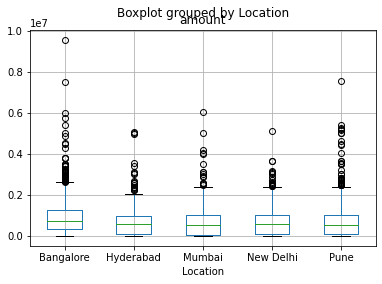

In [ ]:
#TODO: Compare distribution of salaries by location...
df.boxplot(column='amount', by='Location')

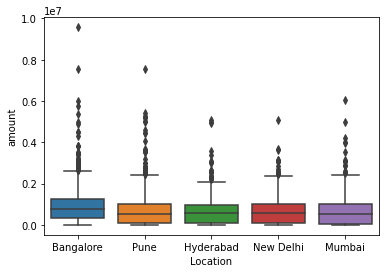

In [ ]:
import seaborn as sns
sns.boxplot(x=df.Location, y=df.amount)

# *Pandas Foundations*: [10 minutes to Pandas...](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)

# *Python Foundations*: An Informal Intro To Python

# **Assignment for the week**

1. (20 Points) Which (location, job-title) pair has most salaries *reported*?

2. (20 Points) Can you plot the salary distributions, by job-title? Which job title offers the highest mean and median salaries? NOTE: You can ignore the impact of "number of reported salaries" for this question. 

3. (20 Points) Make sense of Job-Titles: Derive two new columns, 'Level' and 'Field' from the job-title. Suggestions:
> * Level may resolve into one of the following values: Associate, Junior, Senior, Lead, Consultant, Manager
> * Field may resolve into one of the following values: Data Science, Data Engineering, Machine Learning, Data Analysis

4. (20 Points, dependent on 3) Visualize field wise average-salaries offered by big_techs:
> * Create the following set for big_techs {'IBM', 'Google', 'Apple', 'Microsoft', 'Amazon'}. Filter the data to only these companies. (HINT: filter using a lambda function that looks 'in' the above set)
> * Create a grouped-bar chart with Field on the x-axis, with bar color indicating the company and height indicating the average offered salary. (HINT: Use sns.barplot) 

5. (20 Points) In the lecture, we ignored other currencies. Can you include "$" & "£", perform the conversions into "₹" and check if the highest salary changes?

6.   BONUS CHALLENGE (20 points): If you observe carefully, there is one data analyst from Pune, who has been paid "AFN 1,56,179/yr":
>*   What are the values of currency, amount and freq obtained as per the code provided in the lecture? Why are they incorrect? 
>*   How can you correct them? HINT: Google for Pattern-Matching/Regular-Expressions in Python.









---





Question 1


    Step-1. Calculate the index of highest 'Salaries Reported' in the original dataframe. 


In [ ]:
#We get the index of maximum Salaries Reported in the dataframe and save it in a new variable 'max_value' 
max_value= salaries_df['Salaries Reported'].idxmax()

    Step-2. Now print Location and Job Title using the variable in which index was saved in the last part.
    Note: The answer will not change if we use df instead of salaries_df since both have no missing values in Salaries Reported column. 

In [ ]:
#To print the Location and Job Title which has maximum Salaries Reported using loc (it can access group of values using labels)
salaries_df.loc[max_value][['Location', 'Job Title']]

Location          Bangalore
Job Title    Data Scientist
Name: 0, dtype: object

Question 2


    Step-1. First part is to plot Salary distributions against Job Title. Since Salary datatype is string then wer will use amount (one numeric datatype). 

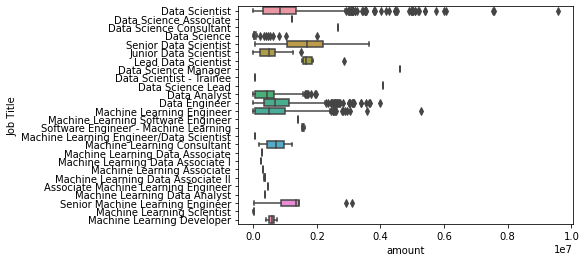

In [ ]:
#boxplot 
sns.boxplot(y=df['Job Title'], x=df.amount)

    Step-2. In the above plot we can see that 'Data Sciece Manager' profile has highest mean and median. Let's verify that. 

In [ ]:
#To find the job-title which has highest mean & median amount/Salary
df.groupby('Job Title').agg({'amount':['mean', 'median']}).idxmax()

amount  mean      Data Science Manager
        median    Data Science Manager
dtype: object

Question 3


    Step-1. Make two lists of strings that we want to filter. Here we have Level and Field. 


In [ ]:
#possible Levels from dataset and make a new array to match 
Lev = ['Associate', 'Trainee', 'Junior', 'Senior', 'Lead', 'Consultant', 'Manager']
#Possible Fields from dataset and make a new array to match
fil = ['Data Scientist','Data Science','Data Analyst', 'Data Engineer','Machine Learning Engineer', 'Machine Learning Software Engineer',
       'Machine Learning Engineer/Data Scientist',
       'Machine Learning Data Associate II','Associate Machine Learning Engineer','Machine Learning Data Analyst',
       'Machine Learning Engineer', 'Machine Learning Scientist','Machine Learning Developer']

    Step-2. There are many ways to do match the strings and save it into a new column. I am going to use lambda with the help of a function 

In [ ]:
df.head()

,Company Name,Job Title,Salaries Reported,Location,Salary,currency,amount,freq,new,Level
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",₹,648573.0,yr,209.000000,UNKNOWN_LEVEL
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",₹,1191950.0,yr,350.666667,UNKNOWN_LEVEL
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",₹,836874.0,yr,306.000000,UNKNOWN_LEVEL
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",₹,669578.0,yr,217.666667,UNKNOWN_LEVEL
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",₹,944110.0,yr,54.333333,UNKNOWN_LEVEL


In [ ]:
import numpy as np
#Make a function func(x) to match the list of strings 
def func(x):
    for k in Lev:
        if k in x:
            return k
        else:
            continue
    return 'Associate'

df['Level'] = df['Job Title'].apply(func)  
df['Level'] = np.where(df['Level']==df['Job Title'], 'Missing', df['Level'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
df[df.Level=='UNKNOWN_LEVEL']['Job Title'].value_counts()

Data Analyst                            983
Data Engineer                           796
Machine Learning Engineer               562
Data Science                             43
Software Engineer - Machine Learning      2
Machine Learning Developer                2
Data Science Associate                    1
Machine Learning Software Engineer        1
Machine Learning Data Associate           1
Machine Learning Associate                1
Associate Machine Learning Engineer       1
Machine Learning Data Analyst             1
Name: Job Title, dtype: int64

In [ ]:
df.Level.value_counts()

UNKNOWN_LEVEL    2394
Scientist        1823
Senior             48
Junior             18
Lead                7
Consultant          3
Associate I         3
Manager             1
Trainee             1
Name: Level, dtype: int64

    Step-3. Now we will do the same for the list fil.

In [ ]:
#Similary we will use the function to generate Field column 
def func(x):
    for k in fil:
        if k in x:
            return k
    return x
df['Field'] = df['Job Title'].apply(lambda x: func(x))
df.tail(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Company Name,Job Title,Salaries Reported,Location,Salary,currency,amount,freq,new,Level,Field
4242,Fresher,Machine Learning Engineer,1.0,New Delhi,"₹18,088/mo",₹,18088.0,mo,53.000000,Missing,Machine Learning Engineer
4243,GlobalLogic,Machine Learning Engineer,1.0,New Delhi,"₹20,824/mo",₹,20824.0,mo,422.000000,Missing,Machine Learning Engineer
4244,Snapdeal,Machine Learning Engineer,1.0,New Delhi,"₹12,10,284/yr",₹,1210284.0,yr,102.000000,Missing,Machine Learning Engineer
4245,Quantiphi,Machine Learning Engineer,81.0,Mumbai,"₹8,39,303/yr",₹,839303.0,yr,116.666667,Missing,Machine Learning Engineer
4246,Tata Consultancy Services,Machine Learning Engineer,6.0,Mumbai,"₹8,24,909/yr",₹,824909.0,yr,313.666667,Missing,Machine Learning Engineer
...,...,...,...,...,...,...,...,...,...,...,...
4339,TaiyōAI,Machine Learning Scientist,1.0,Mumbai,"₹5,180/mo",₹,5180.0,mo,92.500000,Missing,Machine Learning Scientist
4340,Decimal Point Analytics,Machine Learning Developer,1.0,Mumbai,"₹7,51,286/yr",₹,751286.0,yr,114.666667,Missing,Machine Learning Developer
4341,MyWays,Machine Learning Developer,1.0,Mumbai,"₹4,10,952/yr",₹,410952.0,yr,322.000000,Missing,Machine Learning Developer
4342,Market Pulse Technologies,Software Engineer - Machine Learning,1.0,Mumbai,"₹16,12,324/yr",₹,1612324.0,yr,117.333333,Missing,Software Engineer - Machine Learning


Question 4 


    Step-1. Filtering dataset using big_techs 

In [ ]:
#Create a set and filter df using the big_techs 
#using pandas inbuilt function isin 
big_techs = ['IBM', 'Google', 'Apple', 'Microsoft', 'Amazon']
df_new = df[df['Company Name'].isin(big_techs)]

    Step-2. Now we can plot the filtered graph using barplot and add colors using 'Company Name'

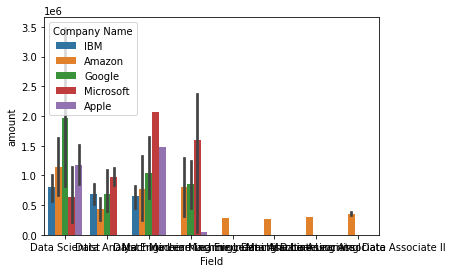

In [ ]:
import seaborn as sns
sns.barplot(x=df_new['Field'], y =df_new['amount'], hue =df_new['Company Name'])
#The graph is very closed on x axis since Field column has too many objects and question asked to plot 'Field' on x axis. 
#We can rotate the graph of exchange the variables on the axes in bar plot to make it look nice. 

Question 5 


    Step-1. Calculate previous maximum salary. 



In [ ]:
#highest salary in salaries_df 
df.amount.max()

9568943.0

    Step-2. Since we need to convert only '$' and '£' then drop 'AFN'  


In [ ]:
#Drop AFN currency because we need to convert only $ and £ currency and make a new dataframe 
salaries_df_new = salaries_df[(salaries_df.currency!= 'A')]
#Other way to solve this 
#salaries_df_new = salaries_df[(salaries_df.Salary!= 'AFN')]

    Step-3. Convert the datatype of amount in dataframe salaries_df_new (we can't do airthmetic operation on string datatype)

In [ ]:
#Change the datatype of amount 
salaries_df_new.amount = salaries_df_new.amount.str.replace(',', '').astype('float')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


    Step-4. Now convert the currency values using lambda function and string matching 

In [ ]:
salaries_df_new['updated_amount']= salaries_df_new.apply(lambda x: (float(x['amount'])*101.26) if (x['currency']=='£') 
                                                 else  (float(x['amount'])*74.72) if (x['currency']=='$') else (float(x['amount'])), axis=1)
#Other Method to solve this   
#m1= salaries_df_new['Salary'].str.contains('£')
#salaries_df_new['updated_amount'] = np.select([m1], [salaries_df_new['amount']*74], default= salaries_df_new['amount'])
salaries_df_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Company Name,Job Title,Salaries Reported,Location,Salary,currency,amount,freq,updated_amount
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",₹,648573.0,yr,648573.0
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",₹,1191950.0,yr,1191950.0
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",₹,836874.0,yr,836874.0
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",₹,669578.0,yr,669578.0
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",₹,944110.0,yr,944110.0


    Step-5. Now we can check the current highest salary in the dataset. 

In [ ]:
#In df, highest salary was 9568943.0 and after converting '$' and '£' into '₹' we have a different value i.e. 169590450.52
salaries_df_new.updated_amount.max()

169590450.52

Question 6  BONUS CHALLENGE 

    First Part 

In [ ]:
#Let's check if this is working correct or not for Salary "AFN 1,56,179/yr"
S_Pune = "AFN 1,56,179/yr" 
#We can just check the values of currency, amount and freq using the code discussed above in the class 
#According to the lecture 
S_Pune[0], S_Pune[1:].split("/")[0], S_Pune[1:].split("/")[1] 


('A', 'FN 1,56,179', 'yr')

    The values of currency, amount and freq are incorrect 
    because split function only works with the indices of
    a string. Since we are spliting the string into     
    three parts based on indices then currency isn't 
    recognizing 'AFN' and it is just saving first index 
    of the string as written in the code. Similarly, we 
    get the incorrect value of amount because it is not 
    able to remove FN and save only numeric value only.





    Second part (Correct the code) 



In [ ]:
import locale
import re
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
def split_Salary(text):
    _, currency, num = re.split('^(\D+)', text, 1)
    return currency,num
#Check if the above function is working or not 
split_Salary('$20000')



('$', '20000')